In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import signal
from scipy.fft import fft, fftfreq, fftshift

from ipywidgets import interact
import ipywidgets as widgets

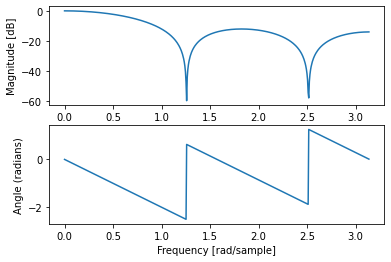

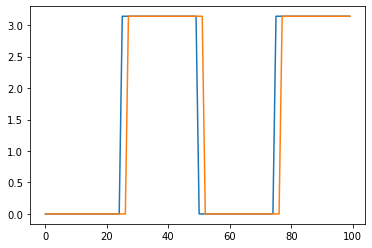

In [64]:
L = 5 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function
t = np.linspace(0,1,100)
x = np.sin(2*np.pi*t*2)
#x = np.random.randn(10) #10 random samples for x
y = signal.convolve(x,b) #filter output using convolution

y = signal.lfilter(b,a,x) #filter output using lfilter function

w, h = signal.freqz(b,a)
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [rad/sample]')

plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles)
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency [rad/sample]')
plt.show()

x_f = abs(fft(x))/x.size
x_f = fftshift(x_f)
y_f = abs(fft(y))/y.size
y_f = fftshift(y_f)
f = fftfreq(x.size, 1/x.size)
f = fftshift(f)



xp = np.unwrap(np.angle(x))
yp = np.unwrap(np.angle(y))

# plt.plot(t, x)
# plt.plot(t, y)

plt.plot(xp)
plt.plot(yp)

# plt.plot(f,x_f)
# plt.plot(f,y_f)

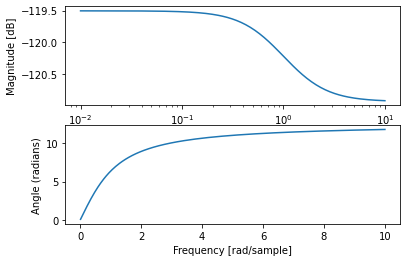

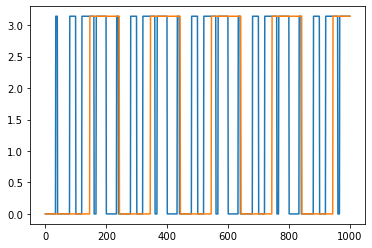

In [60]:
b, a = signal.butter(4, 10, 'lowpass',fs = 1000)
w, h = signal.freqs(b,a)



t = np.linspace(0,1, 1000)
x = np.sin(2*np.pi*5*t)+np.sin(2*np.pi*20*t)

# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# ax1.plot(t, x)


y = signal.convolve(x,b) #filter output using convolution

y = signal.lfilter(b,a,x) #filter output using lfilter function

x_f = abs(fft(x))/x.size
x_f = fftshift(x_f)
y_f = abs(fft(y))/y.size
y_f = fftshift(y_f)
f = fftfreq(x.size, 1/x.size)
f = fftshift(f)


xp = np.angle(x)
yp = np.angle(y)

plt.subplot(2, 1, 1)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [rad/sample]')



plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles)
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency [rad/sample]')
plt.show()

# plt.plot(t,x)
# plt.plot(t,y)



# plt.plot(f,x_f)
# plt.plot(f,y_f)

plt.plot(xp)
plt.plot(yp)